In [1]:
import pandas, warnings

warnings.filterwarnings('ignore')

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip

!unzip HTRU2.zip

`Integrated Profile & DM SNR Curve`

In [3]:
names = ['mean_ip', 'sd_ip', 'ec_ip', 'sw_ip', 'mean_dm', 'sd_dm', 'ec_dm', 'sw_dm', 'pulsar']

data = pandas.read_table('HTRU_2.csv', names=names, sep=',')

data.shape

(17898, 9)

In [4]:
data.iloc[:5]

,mean_ip,sd_ip,ec_ip,sw_ip,mean_dm,sd_dm,ec_dm,sw_dm,pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
data.tail()

,mean_ip,sd_ip,ec_ip,sw_ip,mean_dm,sd_dm,ec_dm,sw_dm,pulsar
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


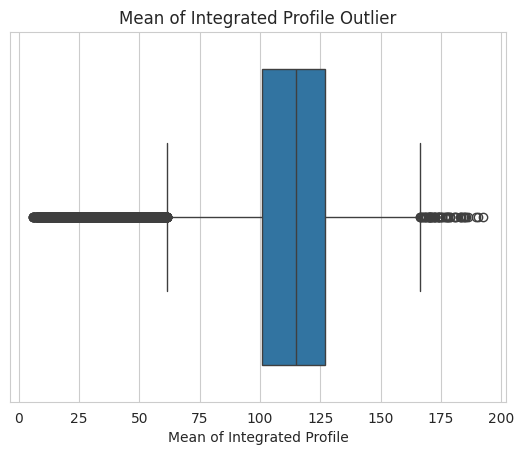

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.set_style('whitegrid')

def Outliplot(table, cols, xlabel, title):
  """
  Outlier Plot
  """
  ploti = sns.boxplot(data=table, x=cols)
  ploti.set_title(title)
  ploti.set_xlabel(xlabel)
  plt.show()

xlabel = 'Mean of Integrated Profile'

title = str(xlabel) + ' Outlier'

Outliplot(data, 'mean_ip', xlabel, title)

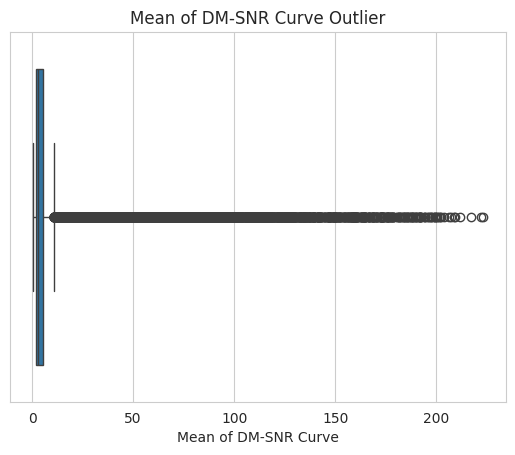

In [7]:
xlabel = 'Mean of DM-SNR Curve'

title = str(xlabel) + ' Outlier'

Outliplot(data, 'mean_dm', xlabel, title)

`Outlier : Robust Scaler : Principal Component Analysis`

In [8]:
from sklearn.preprocessing import RobustScaler

RobustTable = data[data.columns[:8]]

scaler = RobustScaler()